In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

$Q3$

In [4]:
#ONE-SIDED DIFFERENCE
def onesidediff(x,h):
    return (f(x+h) -f(x))/h

#SYMMETRIC DIFFERENCE
def symdiff(x,h):
    return (f(x+h) - f(x-h))/(2*h)

In [5]:
#TEST: SET f = x^3 + x^2 + x + 1 as example
def f(x):
    return x**3 + x**2 + x + 1
#EXACT DERIVATIVE
def df(x):
    return 3*x**2 + 2*x + 1

#Method 1: substituting a random value of h
#TRY x=10 and h=10^-3
estimate1 = onesidediff(10,10**-3)
estimate2 = symdiff(10,10**-3)
error_oneside = np.abs(estimate1 - df(10))
error_symmetric = np.abs(estimate2 - df(10))
print("error using one-sided difference:", error_oneside)
print("error using symmetric difference:", error_symmetric)

error using one-sided difference: 0.03100099993753247
error using symmetric difference: 9.997884262702428e-07


In [6]:
print("order of the first error: 10^-2 , close to the order of h")
print("order of the second error: nearly 10^-6, agrees with the order of h^2")

order of the first error: 10^-2 , close to the order of h
order of the second error: nearly 10^-6, agrees with the order of h^2


In [14]:
#Method 2:graph plotting
H = []
error1 = []
error2 = []
power = np.linspace(-4,-2,10)


for index in power:
    h = 10**index
    estimate1 = onesidediff(10,h)
    estimate2 = symdiff(10,h)
    error_oneside = np.abs(estimate1 - df(10))
    error_symmetric = np.abs(estimate2 - df(10))
    
    H.append(h)
    error1.append(error_oneside)
    error2.append(error_symmetric)


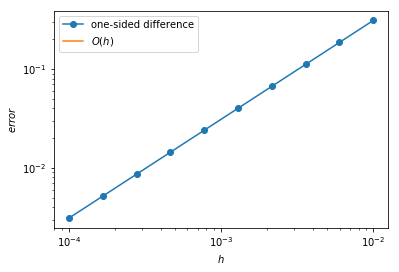

The two graphs overlap, which suggests that the order of accuracy is O(h)


In [15]:
#Plot the graph for one-sided difference
plt.loglog(H, error1, marker='o',label='one-sided difference')
plt.xlabel('$h$')
plt.ylabel('$error$')

# Show a reference line of O(h)
plt.loglog(power, 1e-6*power, label='$O(h)$')

# Add legend
plt.legend(loc=0)

plt.show()

#Add Comment
print("The two graphs overlap, which suggests that the order of accuracy is O(h)")

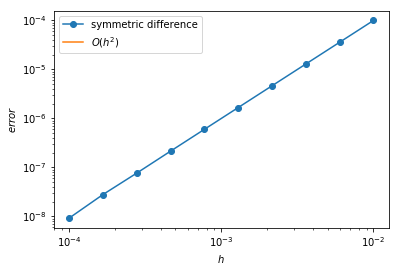

The two graphs overlap, which suggests that the order of accuracy is O(h^2)


In [17]:
#Plot the graph for symmetric difference
plt.loglog(H, error2, marker='o',label='symmetric difference')
plt.xlabel('$h$')
plt.ylabel('$error$')

# Show a reference line of O(h)
plt.loglog(power, 1e-6*power**2, label='$O(h^2)$')

# Add legend
plt.legend(loc=0)

plt.show()

#Add Comment
print("The two graphs overlap, which suggests that the order of accuracy is O(h^2)")

$Q4$

In [18]:
def f(x):
    return x**2*(np.sin(x))**2
def df(x):
    return 2*x*(np.sin(x))**2 + 2*x**2*np.cos(x)*np.sin(x)

#SYMMETRIC METHOD
def symerror(x,h):
    return np.abs(df(x) - symdiff(x,h))
#COMPLEX METHOD
def compl(x,h):
    return (f(x+(1j)*h).imag)/h
def complerror(x,h):
    return np.abs(df(x) - compl(x,h))

In [19]:
#Approxiate f using symmetric difference

print('x=10')
H = [-9,-12,-15]
for index in H:
    h = 10**index
    print(h,symerror(10,h))

print('x=100')
for index in H:
    h = 10**index
    print(h,symerror(100,h))
    
print('x=1000')
for index in H:
    h = 10**index
    print(h,symerror(1000,h))
    
print('x=10000')
for index in H:
    h = 10**index
    print(h,symerror(10000,h))

x=10
1e-09 4.628037501674953e-06
1e-12 0.011634436265055115
1e-15 78.64562264599594
x=100
1e-09 0.031135185290622758
1e-12 45.13005160491957
1e-15 8681.691739640646
x=1000
1e-09 9.883543790085241
1e-12 21685.275831877487
1e-15 931406.9639652378
x=10000
1e-09 25850.961501419544
1e-12 47664024.17659265
1e-15 58200344.20252341


In [20]:
#Approxiate f using complex method

print('x=10')
H = [-9,-12,-15]
for index in H:
    h = 10**index
    print(h,complerror(10,h))

print('x=100')
for index in H:
    h = 10**index
    print(h,complerror(100,h))
    
print('x=1000')
for index in H:
    h = 10**index
    print(h,complerror(1000,h))
    
print('x=10000')
for index in H:
    h = 10**index
    print(h,complerror(10000,h))

x=10
1e-09 0.0
1e-12 0.0
1e-15 1.4210854715202004e-14
x=100
1e-09 0.0
1e-12 1.8189894035458565e-12
1e-15 0.0
x=1000
1e-09 0.0
1e-12 1.1641532182693481e-10
1e-15 1.1641532182693481e-10
x=10000
1e-09 7.450580596923828e-09
1e-12 0.0
1e-15 7.450580596923828e-09


$Q5$

$Q5(a)$

<function matplotlib.pyplot.show(*args, **kw)>

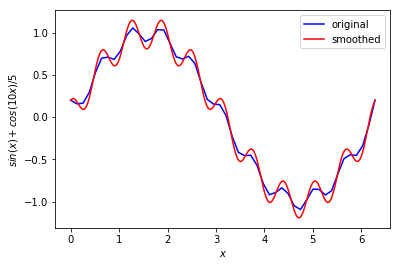

In [21]:
def f1(x):
    return np.sin(x) + np.cos(10*x)/5
def movingave(f,x):
    y =[]
    #STARTING POINT
    y.append(f1(0))
    #MOVING AVERAGES
    for i in range(len(x)-2):
        ave = (f1(x[i]) + f1(x[i+1]) + f1(x[i+2]))/3
        y.append(ave)
    #ENDING POINT
    y.append(f1(2*np.pi))
    
    return y
#Get a list of the evenly spaced numbers
x_original = np.linspace(0,2*np.pi,50)
y_original = movingave(f1(x_original),x_original)

#SMOOTHED DATA
x_smoothed = np.linspace(0,2*np.pi,200)
y_smoothed = movingave(f1(x_smoothed),x_smoothed)

#GRAPH PLOTTING
plt.plot(x_original,y_original,'-b',label='original')
plt.plot(x_smoothed,y_smoothed,'-r',label='smoothed')
plt.xlabel('$x$')
plt.ylabel('$sin(x)+cos(10x)/5$')


plt.legend(loc=0)
plt.show




$Q5(b.i)$

In [46]:
#Calculate each component of matrix B
def convol(A,G,i,j):
    K = L = len(G)
    d = K//2
    component = 0
    for k in range(K):
        for l in range(L):
            component += G[k,l]*A[i-d+k,j-d+l]
    return component
    

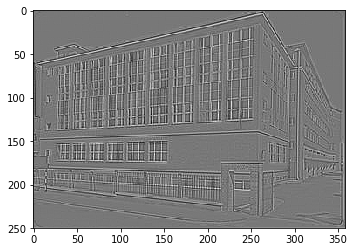

In [50]:
#TEST with the image given

#kernel G
G = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

A = plt.imread("https://github.com/CambridgeEngineering/PartIA-Computing-Examples-Papers/raw/master/images/southwing.png")
new_image = A.copy()

for i in range(A.shape[0]-1):
    for j in range(A.shape[1]-1):
        new_image[i,j] = convol(A,G,i,j)
        
plt.imshow(new_image, cmap='gray');

$Q5(b.ii)$

$O(pq)$

$Q7$

$Q7(a)$

In [24]:
def opt(x,tol):
    para = 0
    while para < tol:
        index = x[-1] - df(x[-1])/df2(x[-1])
        x.append(index)
        para = np.abs(df(index)/df(x[0]))
    return x
#TEST
print("TEST")
# derivatives of f = x^3 + x^2
def df(x):
    return 3*x**2 + 2*x
def df2(x):
    return 6*x
#Set a tolerance value and a staring value: x(0) = 1 and tol = 0.01
x = [1]
opt_list = opt(x,0.01)
print(opt_list)
print("x that minimises the cost:",opt_list[-1])

TEST
[1, 0.16666666666666663]
x that minimises the cost: 0.16666666666666663


$Q7(b)$

In [ ]:
def f(x0,x1):
    return (2-x0)**2 + 100*(x1-x0**2)**2
def
def df2(xo,x1):
    return (-4*100*x0)
def opt2(x0,x1,tol):
    if 
    return 